In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

print("All packages loaded successfully!")

All packages loaded successfully!


In [2]:
# Optional: schöner Stil
sns.set_style("whitegrid")
plt.rcParams.update({'figure.figsize': (12,6), 'font.size': 12})

In [12]:
data = pd.read_csv("../data/electricity-prod-source-stacked.csv")
data.head()
data2 = pd.read_csv("../data/owid-co2-data.csv")
data2.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


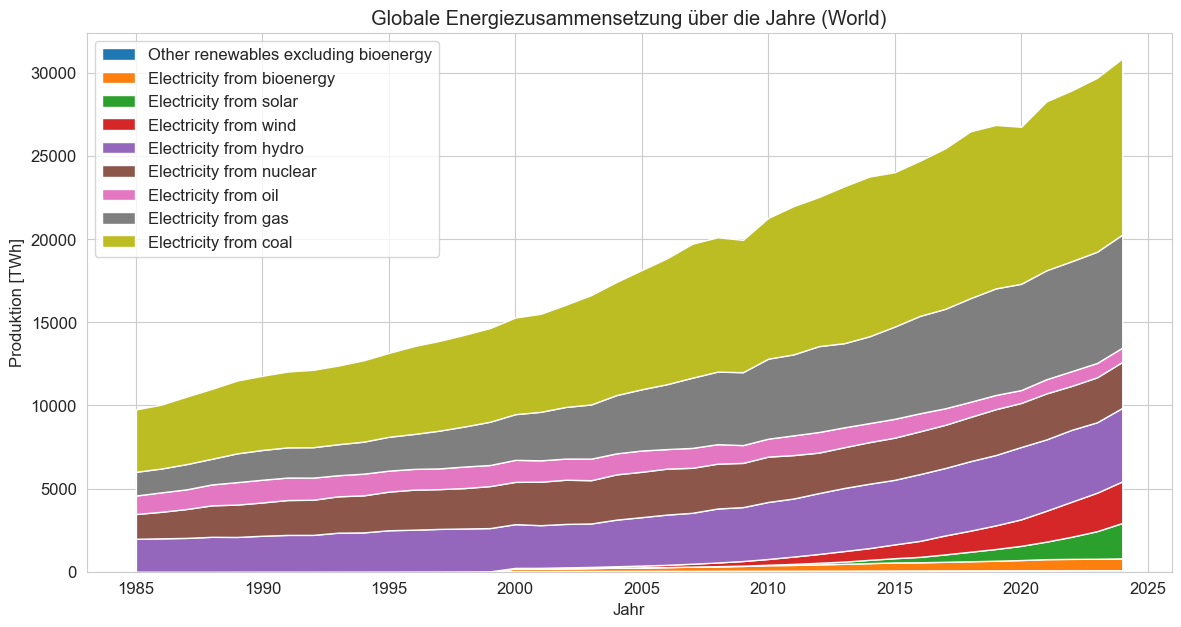

In [4]:
energy_global = data[data['Entity'] == 'World']

# Energiequellen-Spalten
energy_columns = [
    "Other renewables excluding bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from solar - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from hydro - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from nuclear - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from oil - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from gas - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from coal - TWh (adapted for visualization of chart electricity-prod-source-stacked)"
]

# Stacked Area Chart plotten
plt.figure(figsize=(14,7))
plt.stackplot(
    energy_global['Year'],
    [energy_global[col] for col in energy_columns],
    labels=[col.split(' - ')[0] for col in energy_columns]
)
plt.legend(loc='upper left')
plt.title("Globale Energiezusammensetzung über die Jahre (World)")
plt.xlabel("Jahr")
plt.ylabel("Produktion [TWh]")
plt.show()

C:\Users\Nico\AppData\Local\Temp\ipykernel_5064\641106508.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_global['Renewables'] = energy_global[renewables_cols].sum(axis=1)
C:\Users\Nico\AppData\Local\Temp\ipykernel_5064\641106508.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_global['Fossil Fuels'] = energy_global[fossil_cols].sum(axis=1)


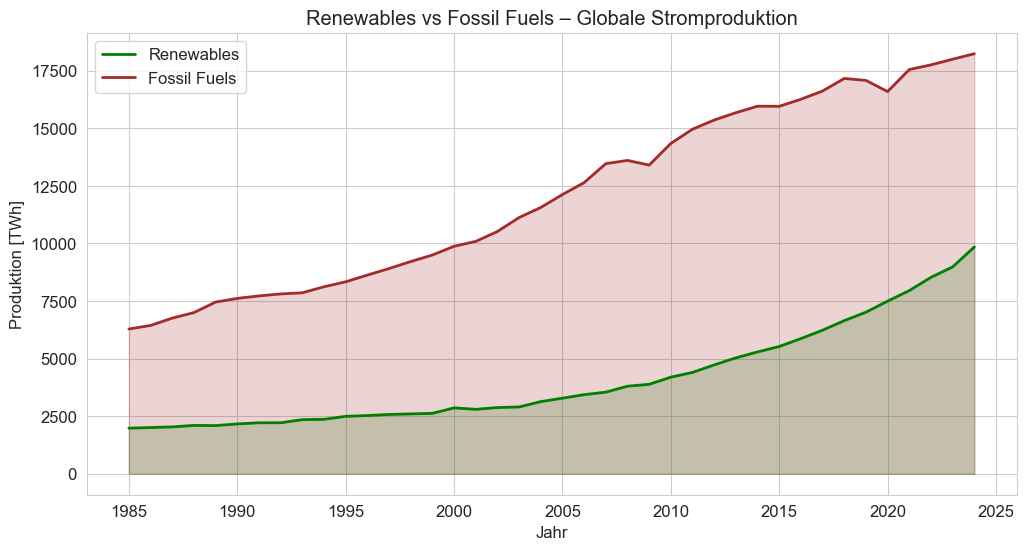

In [5]:
# Spalten für die Gruppen
renewables_cols = [
    "Other renewables excluding bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from solar - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from hydro - TWh (adapted for visualization of chart electricity-prod-source-stacked)"
]

fossil_cols = [
    "Electricity from oil - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from gas - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from coal - TWh (adapted for visualization of chart electricity-prod-source-stacked)"
]

# Summe pro Gruppe
energy_global['Renewables'] = energy_global[renewables_cols].sum(axis=1)
energy_global['Fossil Fuels'] = energy_global[fossil_cols].sum(axis=1)

# Plot
plt.figure(figsize=(12,6))
plt.plot(energy_global['Year'], energy_global['Renewables'], label='Renewables', color='green', linewidth=2)
plt.plot(energy_global['Year'], energy_global['Fossil Fuels'], label='Fossil Fuels', color='brown', linewidth=2)
plt.fill_between(energy_global['Year'], energy_global['Renewables'], color='green', alpha=0.2)
plt.fill_between(energy_global['Year'], energy_global['Fossil Fuels'], color='brown', alpha=0.2)
plt.title("Renewables vs Fossil Fuels – Globale Stromproduktion")
plt.xlabel("Jahr")
plt.ylabel("Produktion [TWh]")
plt.legend()
plt.show()


In [6]:
# Summen berechnen
energy_global['Renewables_TWh'] = energy_global[renewables_cols].sum(axis=1)
energy_global['Fossil_TWh'] = energy_global[fossil_cols].sum(axis=1)
energy_global['Total_TWh'] = energy_global['Renewables_TWh'] + energy_global['Fossil_TWh']

# Anteil der Erneuerbaren (%)
energy_global['Renewable_Share'] = energy_global['Renewables_TWh'] / energy_global['Total_TWh'] * 100


C:\Users\Nico\AppData\Local\Temp\ipykernel_5064\190216638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_global['Renewables_TWh'] = energy_global[renewables_cols].sum(axis=1)
C:\Users\Nico\AppData\Local\Temp\ipykernel_5064\190216638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_global['Fossil_TWh'] = energy_global[fossil_cols].sum(axis=1)
C:\Users\Nico\AppData\Local\Temp\ipykernel_5064\190216638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

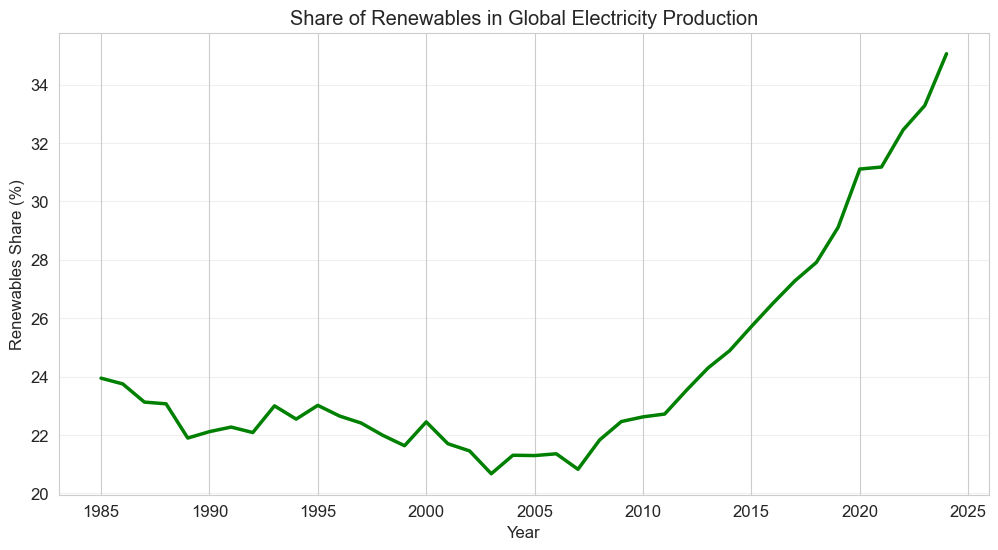

In [7]:
plt.figure(figsize=(12,6))
plt.plot(energy_global['Year'], energy_global['Renewable_Share'], color='green', linewidth=2.5)
plt.title("Share of Renewables in Global Electricity Production")
plt.xlabel("Year")
plt.ylabel("Renewables Share (%)")
plt.grid(axis='y', alpha=0.3)
plt.show()

In [8]:
# Excel-Datei laden
xls = pd.ExcelFile("../data/lcoe-database.xlsx")

# Liste aller Tabs
print(xls.sheet_names)

['Introduction', 'PV-357', 'PV-4610', 'CSP-357', 'CSP-4610', 'WON-357', 'WON-4610', 'WOF-357', 'WOF-4610', 'CC-357', 'CC-4610', 'GT-357', 'GT-4610', 'GEO-357', 'GEO-4610', 'HYD-357', 'HYD-4610', 'COL-357', 'COL-4610', 'NUC-357', 'NUC-4610', 'BIO-357', 'BIO-4610']


C:\Users\Nico\AppData\Local\Temp\ipykernel_5064\1252045768.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


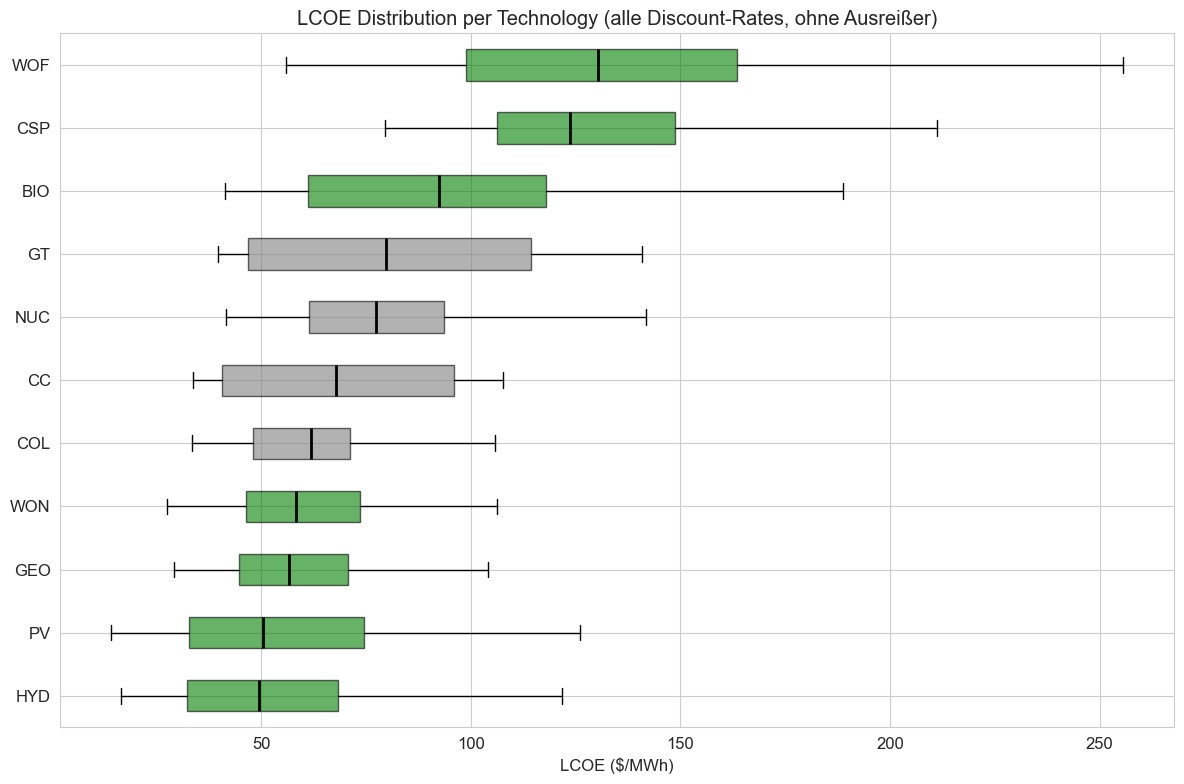

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel-Datei
xls = pd.ExcelFile("../data/lcoe-database.xlsx")

# Tabs filtern (Introduction ignorieren)
tabs = [tab for tab in xls.sheet_names if tab.lower() != "introduction"]

# Dictionary für alle LCOE-Werte pro Technologie
lcoe_values = {}

for tab in tabs:
    # Technologie extrahieren (alles vor dem "-")
    tech = tab.split('-')[0]
    
    df = pd.read_excel(xls, sheet_name=tab, skiprows=4)
    
    # Letzte Spalte = LCOE-Werte
    values = df.iloc[:, -1].dropna().values
    
    # Werte pro Technologie zusammenführen
    if tech in lcoe_values:
        lcoe_values[tech] = list(lcoe_values[tech]) + list(values)
    else:
        lcoe_values[tech] = list(values)

# Optional: Farben für alle Gruppen (erneuerbare grün, fossil grau)
renewables = ['PV', 'CSP', 'WON', 'WOF', 'HYD', 'BIO', 'GEO']
colors = ['green' if tech in renewables else 'gray' for tech in lcoe_values.keys()]

# Sortieren nach Median für bessere Darstellung
sorted_tech = sorted(lcoe_values.keys(), key=lambda x: pd.Series(lcoe_values[x]).median())
sorted_values = [lcoe_values[tech] for tech in sorted_tech]
sorted_colors = [colors[list(lcoe_values.keys()).index(tech)] for tech in sorted_tech]

# Boxplot erstellen
plt.figure(figsize=(12, 8))
box = plt.boxplot(
    sorted_values,
    vert=False,
    labels=sorted_tech,
    patch_artist=True,
    showfliers=False
)

# Farben setzen
for patch, color in zip(box['boxes'], sorted_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

# Mediane dick hervorheben
for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.xlabel("LCOE ($/MWh)")
plt.title("LCOE Distribution per Technology (alle Discount-Rates, ohne Ausreißer)")
plt.tight_layout()
plt.show()

C:\Users\Nico\AppData\Local\Temp\ipykernel_5064\637326359.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


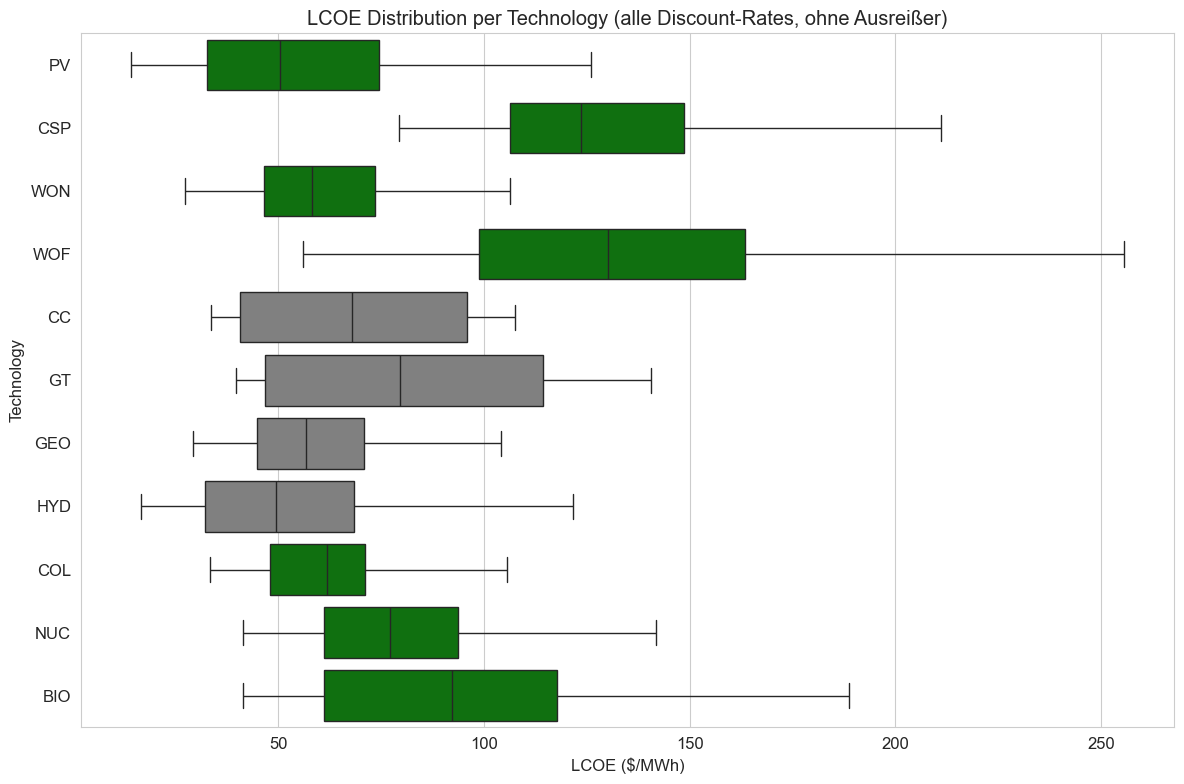

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Daten vorbereiten
data = []
for tech, values in lcoe_values.items():
    for v in values:
        data.append({'Technology': tech, 'LCOE': v})
df_plot = pd.DataFrame(data)

# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='LCOE', 
    y='Technology', 
    data=df_plot,
    palette=['green' if tech in renewables else 'gray' for tech in sorted_tech],
    showfliers=False
)
plt.xlabel("LCOE ($/MWh)")
plt.title("LCOE Distribution per Technology (alle Discount-Rates, ohne Ausreißer)")
plt.tight_layout()
plt.show()

In [13]:
# Renewable Share berechnen
renewables_cols = [
    'Other renewables excluding bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)',
    'Electricity from bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)',
    'Electricity from solar - TWh (adapted for visualization of chart electricity-prod-source-stacked)',
    'Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked)',
    'Electricity from hydro - TWh (adapted for visualization of chart electricity-prod-source-stacked)'
]
all_energy_cols = data.columns[3:]
data['Total_TWh'] = data[all_energy_cols].sum(axis=1)
data['Renewable_Share'] = data[renewables_cols].sum(axis=1) / data['Total_TWh'] * 100

# Letztes Jahr pro Land
latest_year = data.groupby('Entity')['Year'].transform('max')
data_latest = data[data['Year'] == latest_year]

# CO2 pro Kopf
latest_year_co2 = data2.groupby('country')['year'].transform('max')
data2_latest = data2[data2['year'] == latest_year_co2]
co2_df = data2_latest[['country', 'co2_per_capita']].copy()

# Merge
merged = pd.merge(data_latest, co2_df, left_on='Entity', right_on='country', how='inner')



In [17]:
countries_100 = merged[merged['Renewable_Share'] == 100]['Entity'].unique()
print(countries_100)
print(f"Anzahl der Länder mit 100%: {len(countries_100)}")

['Albania' 'Bhutan' 'Central African Republic'
 'Democratic Republic of Congo' 'Ethiopia' 'Iceland' 'Lesotho' 'Nepal'
 'Paraguay']
Anzahl der Länder mit 100%: 9


In [18]:
# Länder, die überprüft werden sollen
countries_to_check = ['Brazil', 'Germany', 'Switzerland']

# Ausgabe der Renewable Share für die letzten verfügbaren Jahre
merged[merged['Entity'].isin(countries_to_check)][['Entity', 'Year', 'Renewable_Share']]

,Entity,Year,Renewable_Share
26,Brazil,2024,87.721064
74,Germany,2024,57.445425
187,Switzerland,2024,67.213115


C:\Users\Nico\AppData\Local\Temp\ipykernel_5064\1173438222.py:120: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
d:\DVIZ_CODE_FINAL\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


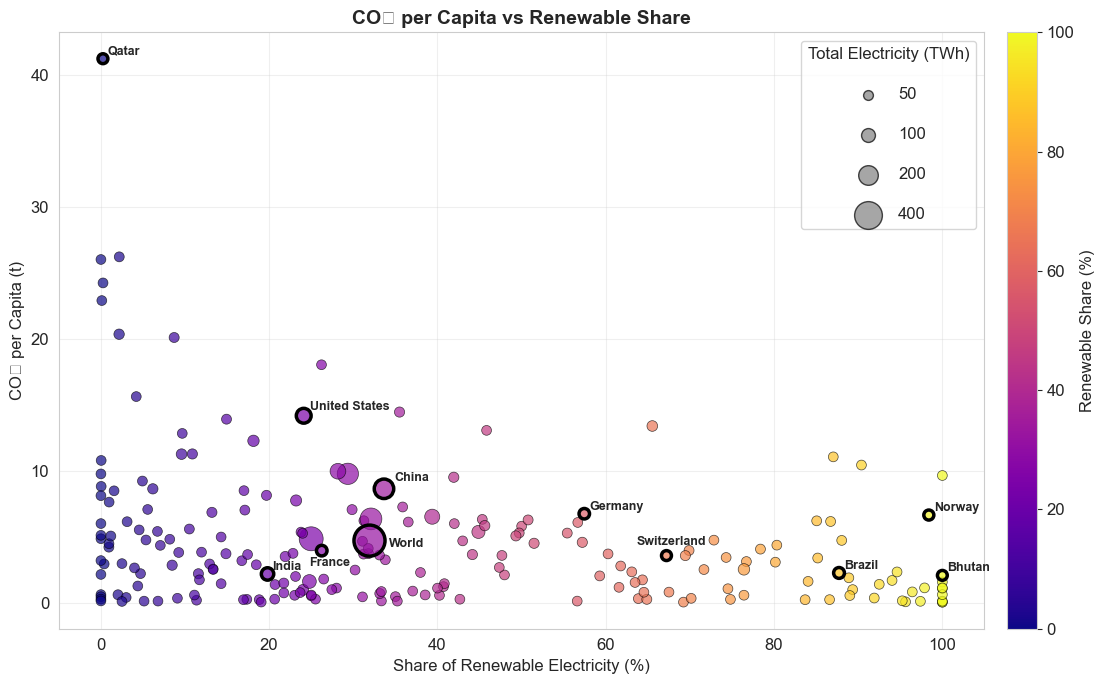

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np

# =========================
# Scatterplot für alle Länder
# =========================
plt.figure(figsize=(12,7))
ax = sns.scatterplot(
    data=merged,
    x='Renewable_Share',
    y='co2_per_capita',
    size='Total_TWh',
    hue='Renewable_Share',
    palette='plasma',      # 🔥 Plasma Palette
    alpha=0.7,
    sizes=(50, 500),
    edgecolor='k',
    linewidth=0.5,
    legend=False
)

# =========================
# Achsen mit Pufferzone (auch unter 0)
# =========================
x_min, x_max = merged['Renewable_Share'].min(), merged['Renewable_Share'].max()
y_min, y_max = merged['co2_per_capita'].min(), merged['co2_per_capita'].max()
plt.ylim(0, 30)
plt.xlim(x_min - 5, x_max + 5)
plt.ylim(y_min - 2, y_max + 2)

# =========================
# Achsentitel & Plot-Titel
# =========================
plt.xlabel("Share of Renewable Electricity (%)", fontsize=12)
plt.ylabel("CO₂ per Capita (t)", fontsize=12)
plt.title("CO₂ per Capita vs Renewable Share", fontsize=14, weight='bold')

# =========================
# Farbskala (Colorbar)
# =========================
norm = mpl.colors.Normalize(vmin=x_min, vmax=x_max)
sm = mpl.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Renewable Share (%)', fontsize=12)

# =========================
# Größenlegende
# =========================
size_legend = [50, 100, 200, 400]
handles = [
    plt.scatter([], [], s=s, color='gray', alpha=0.7, edgecolors='k', linewidth=1)
    for s in size_legend
]
plt.legend(
    handles,
    [str(s) for s in size_legend],
    title='Total Electricity (TWh)',
    frameon=True,
    labelspacing=1.5,
    loc='upper right'
)

# =========================
# Länder hervorheben & beschriften
# =========================
highlight_countries = [
    'Switzerland', 'Germany', 'United States',
    'China', 'France', 'Brazil', 'India',
    'Qatar', 'Norway', 'World', 'Bhutan'
]

# 🔧 individuelle Text-Offets
label_offsets = {
    'China': (1.2, 0.6),
    'United States': (0.8, 0.4),
    'World': (2.3, -0.5),
    'France': (-1.5, -1.2),
    'Switzerland': (-3.5, 0.8)
}

# Größen-Skalierung rekonstruieren
min_size, max_size = 50, 500
twh_min, twh_max = merged['Total_TWh'].min(), merged['Total_TWh'].max()

def scale_size(twh):
    return min_size + (twh - twh_min) / (twh_max - twh_min) * (max_size - min_size)

for _, row in merged.iterrows():
    if row['Entity'] in highlight_countries:

        # Pinke Umrandung
        ax.scatter(
            row['Renewable_Share'],
            row['co2_per_capita'],
            s=scale_size(row['Total_TWh']),
            facecolors='none',
            edgecolors='black',
            linewidth=2.5,
            zorder=3
        )

        # Default-Offset
        dx, dy = label_offsets.get(row['Entity'], (0.6, 0.3))

        ax.text(
            row['Renewable_Share'] + dx,
            row['co2_per_capita'] + dy,
            row['Entity'],
            fontsize=9,
            weight='bold'
        )

# =========================
# Layout
# =========================
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
